In [1]:
library(forecast)
library(urca)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 4.0009 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


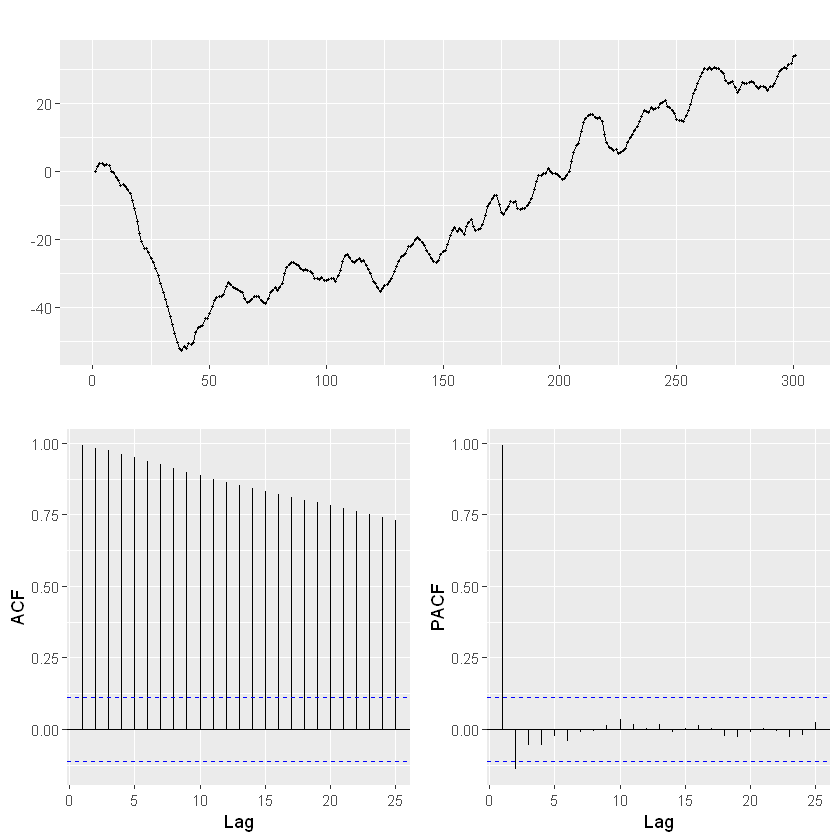

In [4]:
set.seed(1234)
# arima.sim로 ARIMA(1,1,1) 모델에 맞는 가상 데이터 생성
arima1_1_1<-arima.sim(model=list(order=c(1,1,1), ar=0.7, ma=-0.2), n=300)

# 생성한 raw data 정상성파악 - ACF, PACF 함수 사용
ggtsdisplay(arima1_1_1) 
# Corrlogram에서 첫번째에 해당하는 case

# 생성한 raw data 정상성파악 - KPSS검정 사용
summary(ur.kpss(arima1_1_1))
# 검정통계량값이 4.0009로 유의수준의 임계치보다 큰 값
# KPSS의 귀무가설(해당 데이터는 정상시계열이다)을 기각! => 해당 데이터는 비정상성이다라고 결론지어짐


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.5741 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


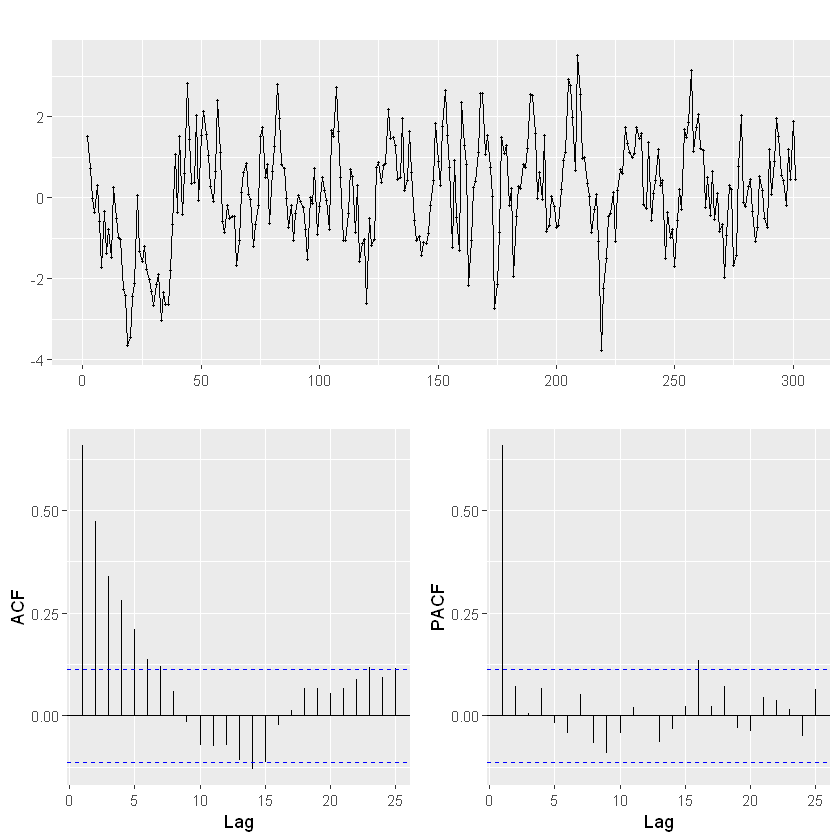

In [5]:
# raw data를 1번 차분한 후 데이터의 정상성 파악해보기
d_arima1_1_1<-diff(arima1_1_1)
ggtsdisplay(d_arima1_1_1)
summary(ur.kpss(d_arima1_1_1))

# 검정통계량값이 0.5741로 유의수준 1%의 임계치와 비교!! => 99%신뢰수준 임계치 0.739보다 작으므로 귀무가설 채택=> 해당 데이터는 정상성이다!
# ACF, PACF함수를 살펴보니 AR(1)정도는 해야할 것 같다.. 그리고 MA 안하거나 1정도 해보기


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 6.7601, df = 8, p-value = 0.5627

Model df: 2.   Total lags used: 10



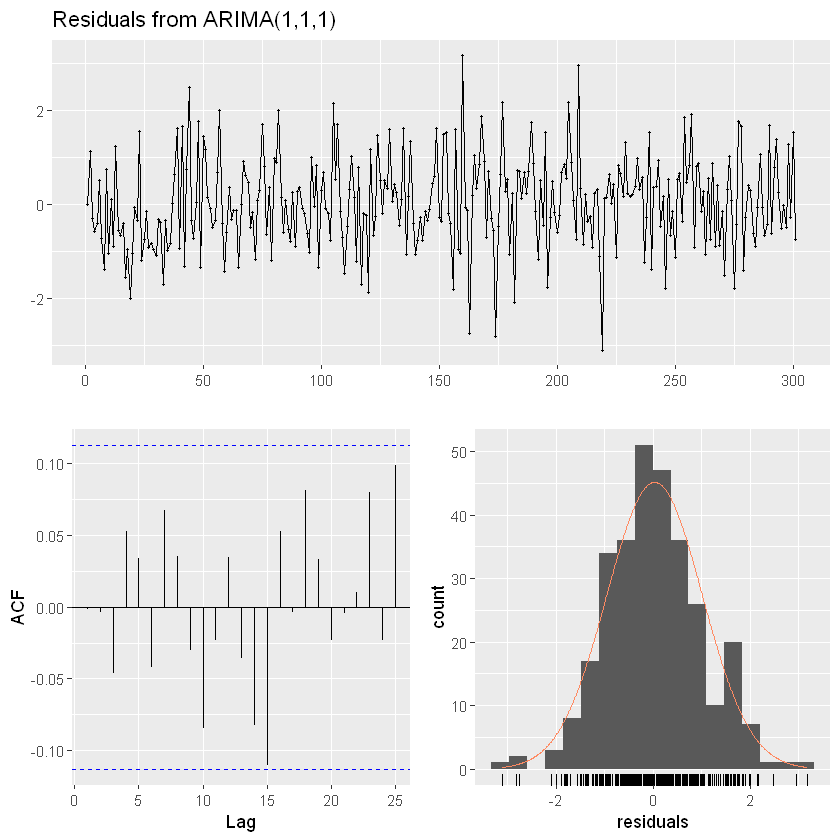


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 8.1592, df = 9, p-value = 0.5182

Model df: 1.   Total lags used: 10



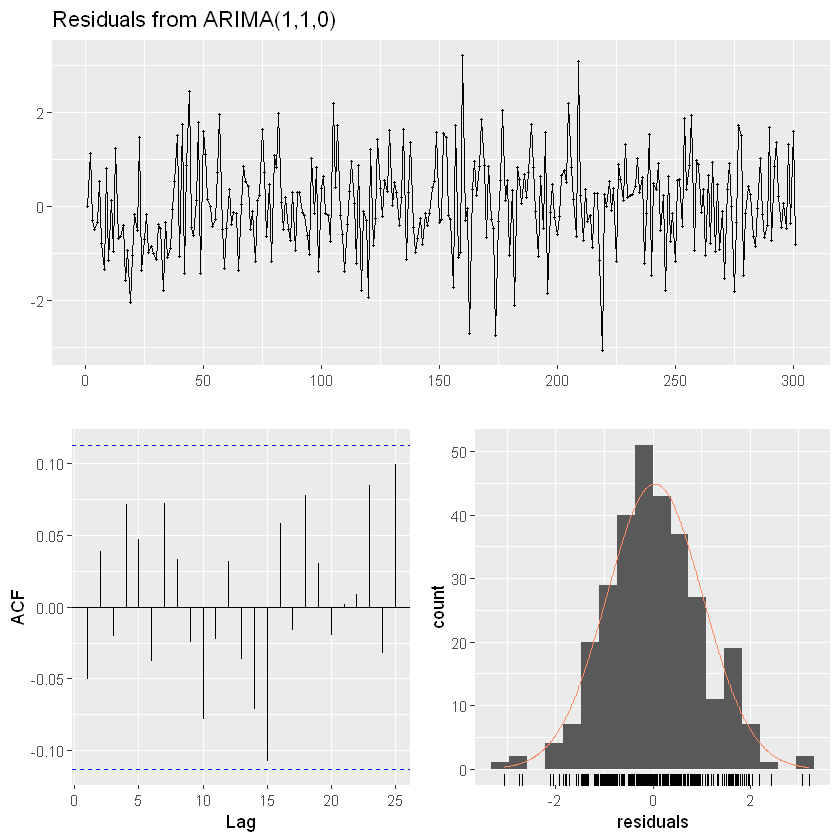


	Ljung-Box test

data:  Residuals from ARIMA(1,2,1)
Q* = 7.8, df = 8, p-value = 0.4532

Model df: 2.   Total lags used: 10



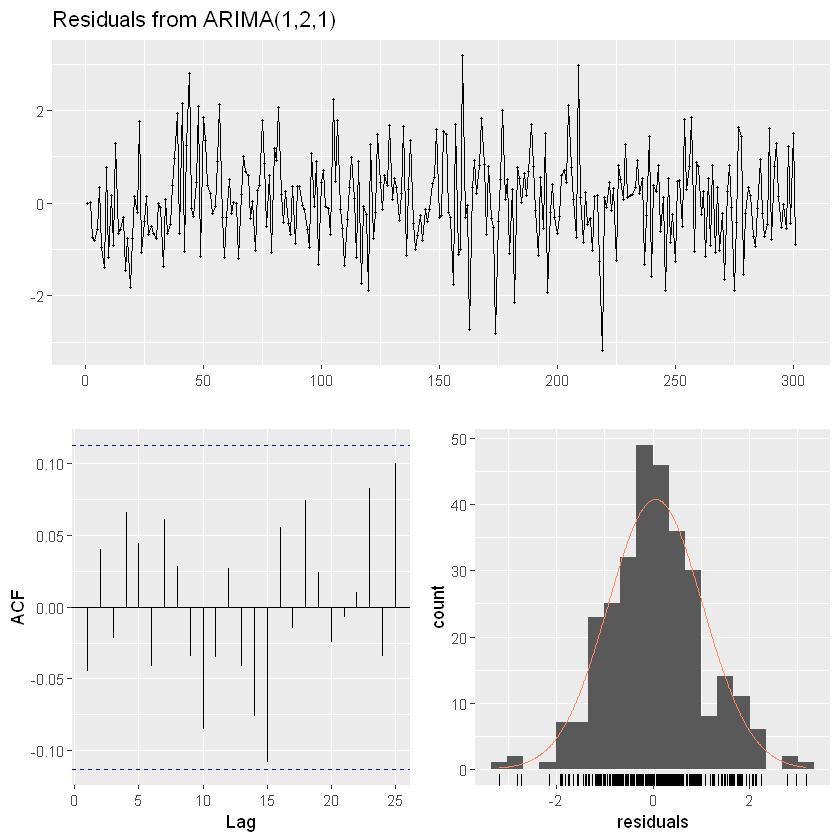

In [9]:
# 모형 fit시킬때 차분할거면 차분하기 전 원본 데이터를 넣어야해! (차분한 데이터 넣으면 이중차분됨)
# ARIMA(1,1,1) 모델
arima_fit1<-Arima(arima1_1_1,order=c(1,1,1))

# ARIMA(1,1,0) 모델
arima_fit2<-Arima(arima1_1_1,order=c(1,1,0))

# auto.arima 모델
arima_fit3<-auto.arima(arima1_1_1)

# 각 모델의 잔차 그래프 그려서 적합성보기
checkresiduals(arima_fit1)
checkresiduals(arima_fit2)
checkresiduals(arima_fit3)

# auto.arima은 특이하게 차분을 2번 해줌..
# 둘다 유의확률(p-value)값이 유의수준보다 크!므로 귀무가설을 채택= 잔차들의 자기상관성이 없음!
# 그런데 둘 중에 잔차그래프만 보고 어떤 모형이 더 적합한지는 잘 아직 모른다 => 예측값과 비교를 통해 RMSE값으로 선택하기

In [10]:
# RMSE값을 비교해서 더 적합한 모형 선접
summary(arima_fit1)
summary(arima_fit2)
summary(arima_fit3)

# ARIMA(1,1,1)모형이 가장 RMSE값이 낮으므로 적합
3 # 원래는 train,test 데이터 나누어서 test와의 비교를통한 RMSE값 비교가 가장 객관적!

Series: arima1_1_1 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.7248  -0.1124
s.e.  0.0604   0.0884

sigma^2 estimated as 0.9781:  log likelihood=-421.64
AIC=849.29   AICc=849.37   BIC=860.4

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.03516913 0.9840252 0.7739969 45.50617 63.99394 0.7348889
                     ACF1
Training set -0.001669357
Series: arima1_1_1 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.6621
s.e.  0.0431

sigma^2 estimated as 0.9801:  log likelihood=-422.45
AIC=848.9   AICc=848.94   BIC=856.3

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.03806468 0.9866853 0.7758803 47.62324 65.47506 0.7366771
                   ACF1
Training set -0.0504315
Series: arima1_1_1 
ARIMA(1,2,1) 

Coefficients:
         ar1      ma1
      0.6482  -0.9865
s.e.  0.0478   0.0126

sigma^2 estimated as 0.9888:  log likelihood=-422.63

# ARIMA D.I.Y

In [2]:
setwd("C:/Users/joyh1/Desktop/빅데이터_20-1/R_data")
data<-read.csv("data_ARIMA_DIY.csv")

In [3]:
# split data
data_1<-data[,1]
data_2<-data[,2]
data_3<-data[,3]
data_4<-data[,4]

In [4]:
# Time-series monthly 데이터로 변환(2001년 1월~2006년 12월)
ts_1<-ts(data_1, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_2<-ts(data_2, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_3<-ts(data_3, start=c(2001,1), end=c(2006,12), frequency = 12)
ts_4<-ts(data_4, start=c(2001,1), end=c(2006,12), frequency = 12)

In [6]:
#KPSS 검정
library(urca)
summary(ur.kpss(ts_1))
# => 귀무가설을 채택 = 해당 데이터는 정상시계열이다.


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0449 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


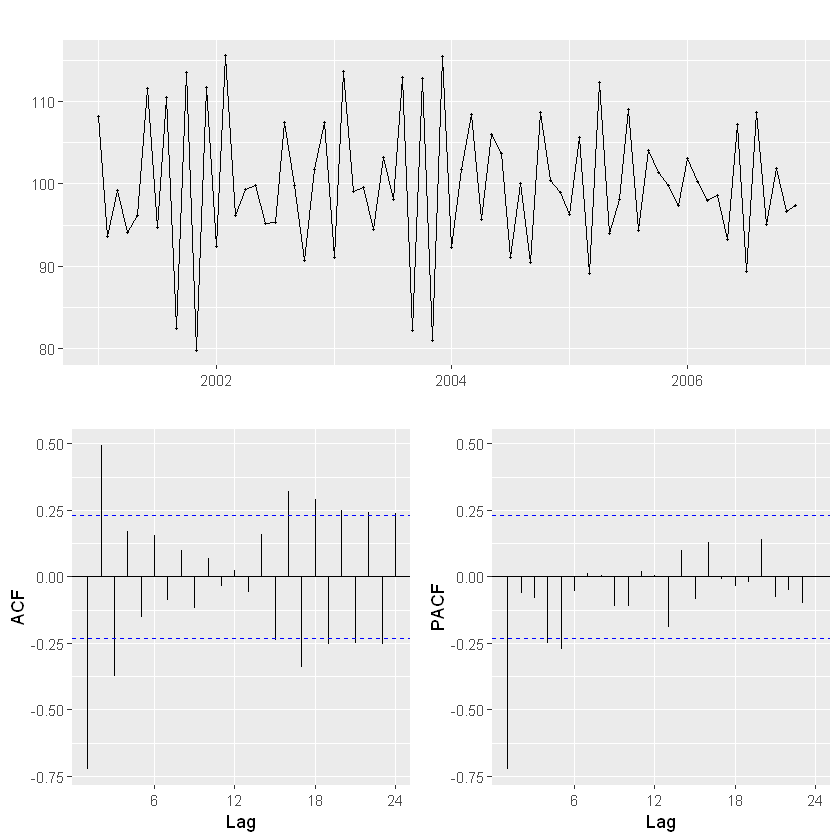

In [5]:
# data_1
ggtsdisplay(ts_1)
# PACF 그래프를 보니까 AR(1)또는 MA(1)정도 사용하면 될 것 같음..! 그리고 예상은 ACF그래프 생김새상(Correlogram) AR(1)이 더 나을 것 같음

Series: ts_1 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.7248  99.8025
s.e.   0.0796   0.3885

sigma^2 estimated as 32.87:  log likelihood=-227.26
AIC=460.51   AICc=460.87   BIC=467.34

Training set error measures:
                     ME     RMSE      MAE        MPE    MAPE     MASE
Training set 0.04825857 5.653194 4.693908 -0.2869442 4.78306 0.521642
                    ACF1
Training set -0.04736431

	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 13.366, df = 12, p-value = 0.343

Model df: 2.   Total lags used: 14




	Box-Pierce test

data:  ar_fit$residuals
X-squared = 0.16152, df = 1, p-value = 0.6878


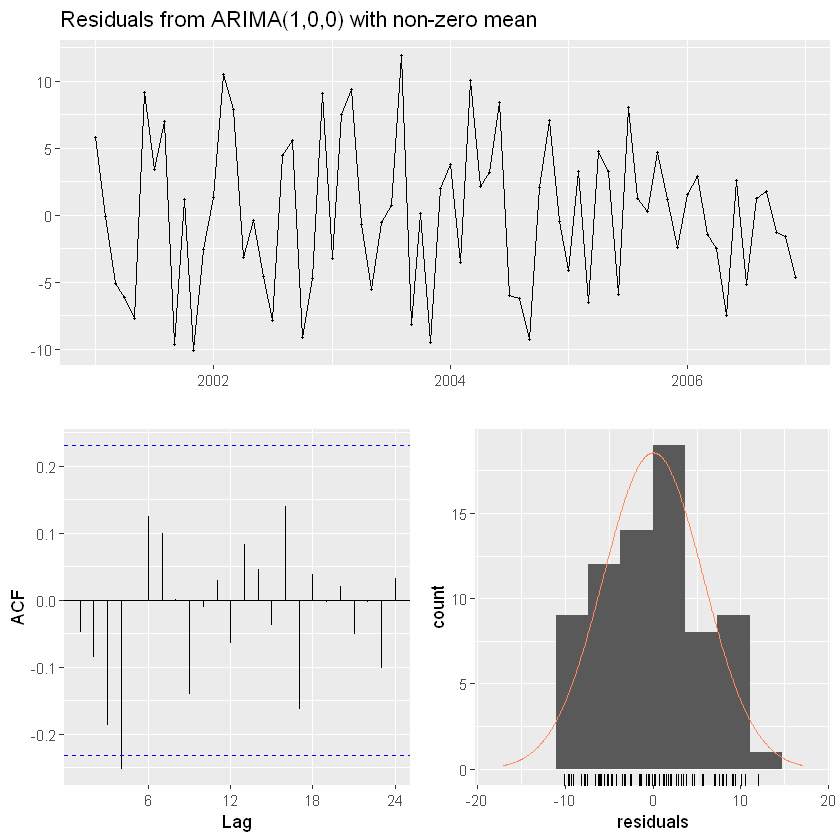

In [14]:
# 1. AR(1)
ar_fit<-Arima(ts_1, order=c(1,0,0))
summary(ar_fit)
checkresiduals(ar_fit)
Box.test(ar_fit$residuals)
# 식 : yt = (-0.7248)*yt-1 + (99.8025)*(1-(-0.7248)) (=C)

Series: ts_1 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1     mean
      -1.0000  99.9748
s.e.   0.0528   0.0315

sigma^2 estimated as 33.06:  log likelihood=-229.24
AIC=464.47   AICc=464.82   BIC=471.3

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.4125451 5.669438 4.624181 -0.7881686 4.757089 0.5138931
                    ACF1
Training set -0.07429556

	Ljung-Box test

data:  Residuals from ARIMA(0,0,1) with non-zero mean
Q* = 19.305, df = 12, p-value = 0.08144

Model df: 2.   Total lags used: 14




	Box-Pierce test

data:  ma_fit$residuals
X-squared = 0.39743, df = 1, p-value = 0.5284


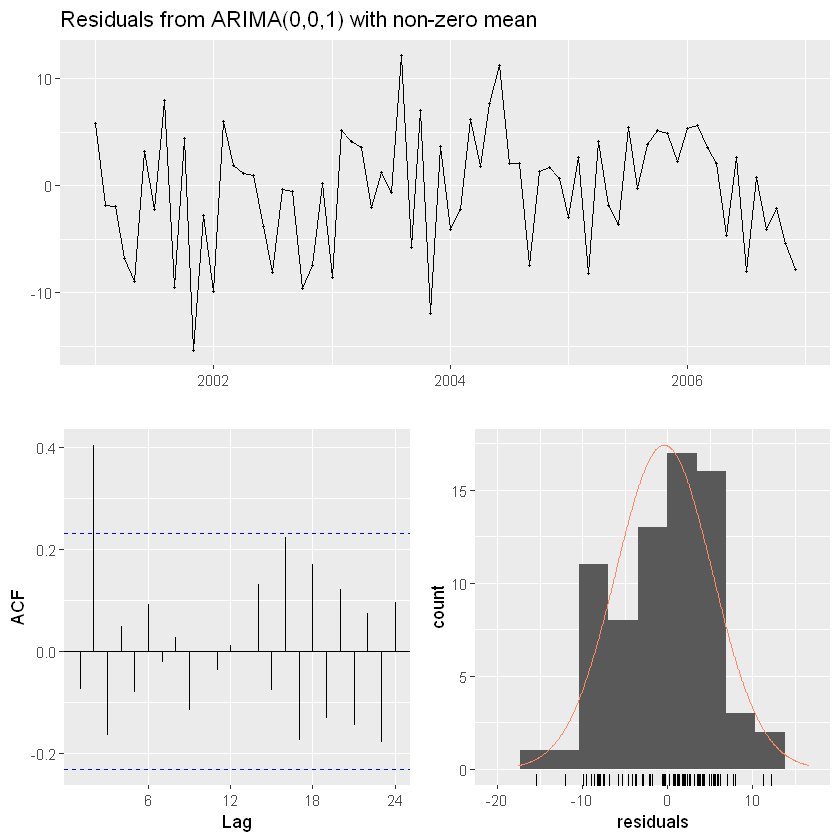

In [15]:
# 2. MA(1)
ma_fit<-Arima(ts_1, order=c(0,0,1))
summary(ma_fit)
checkresiduals(ma_fit)
Box.test(ma_fit$residuals)
# 식 : yt = (-1)*εt-1 + 99.9748

In [13]:
# 3.auto.arima
auto_fit<-auto.arima(ts_1)
summary(auto_fit)
# AR(1)모형으로 자동으로 적합됨

Series: ts_1 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.7248  99.8025
s.e.   0.0796   0.3885

sigma^2 estimated as 32.87:  log likelihood=-227.26
AIC=460.51   AICc=460.87   BIC=467.34

Training set error measures:
                     ME     RMSE      MAE        MPE    MAPE     MASE
Training set 0.04825857 5.653194 4.693908 -0.2869442 4.78306 0.521642
                    ACF1
Training set -0.04736431


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007      101.54389 94.19626 108.8915 90.30666 112.7811
Feb 2007       98.54033 89.46560 107.6151 84.66173 112.4189
Mar 2007      100.71736 90.85575 110.5790 85.63533 115.7994
Apr 2007       99.13941 88.88857 109.3902 83.46211 114.8167
May 2007      100.28314 89.83362 110.7326 84.30199 116.2643

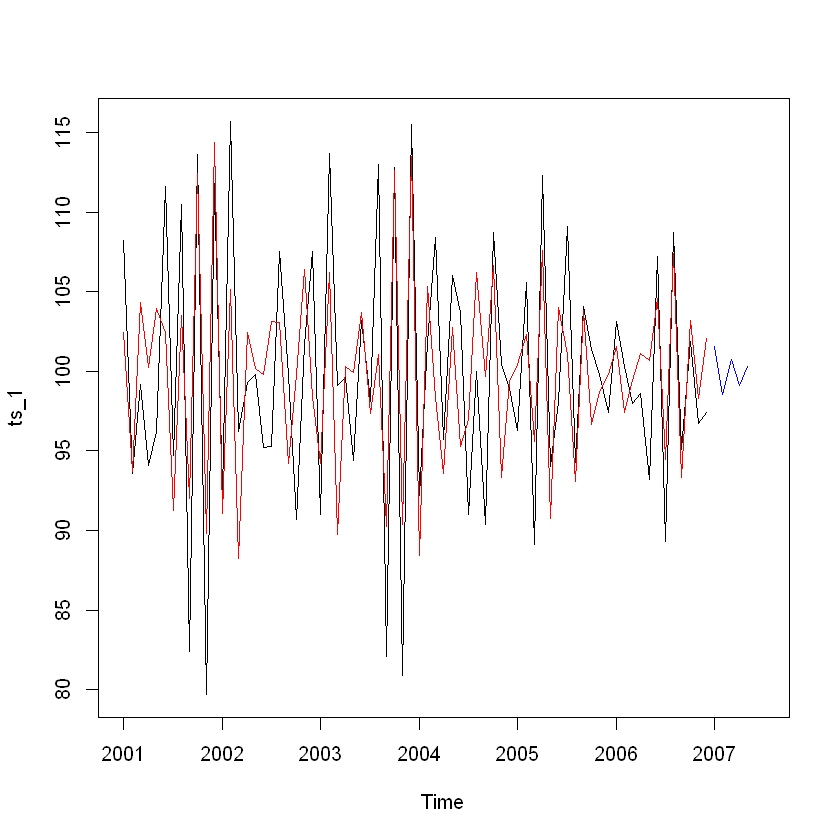

In [27]:
# 가장 적합한 모델은 AR(1)모형!
ar_for<-forecast(ar_fit, h=5)
plot(ts_1, xlim=c(2001,2007.5))
lines(ar_for$fitted, col='red')
lines(ar_for$mean, col='blue')
ar_for

---


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.191 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


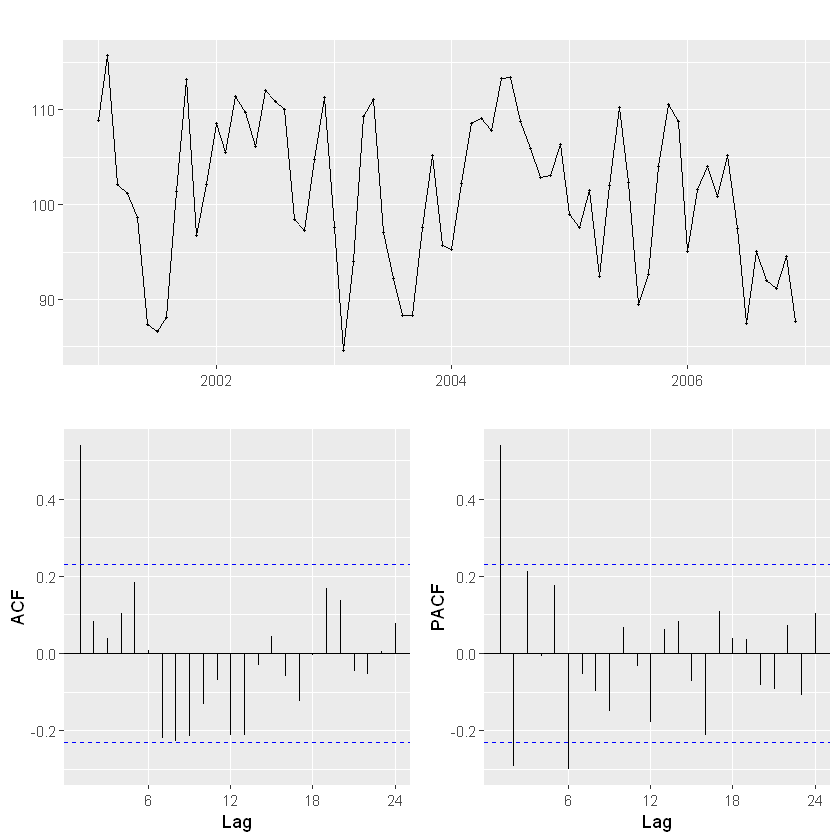

In [29]:
# kpss검정
summary(ur.kpss(ts_2))
# 정상시계열임

# acf, pacf
ggtsdisplay(ts_2)
# AR(1) or AR(2) , auto.arima

In [31]:
# AR(1)
ar1_fit<-Arima(ts_2, order=c(1,0,0))
summary(ar1_fit)
#식 : yt = 0.5621*yt-1 + 101.1344 * (1 - 0.5621) 

#AR(2)
ar2_fit<-Arima(ts_2, order=c(2,0,0))
summary(ar2_fit)
#식 : yt = 0.7254*yt-1 + (-0.3065)*yt-2 + 101.1206*(1 - 0.7254 - (-0.3065))

#auto
auto_fit<-auto.arima(ts_2)
summary(auto_fit)
# 식 : yt = 0.8058*εt-1 + (-0.2414)*εt-2 + 101.3566

Series: ts_2 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1      mean
      0.5621  101.1344
s.e.  0.0993    1.7543

sigma^2 estimated as 45.24:  log likelihood=-238.57
AIC=483.14   AICc=483.49   BIC=489.97

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.07901146 6.631726 5.645538 -0.522692 5.673341 0.5530323
                  ACF1
Training set 0.1661977
Series: ts_2 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2      mean
      0.7254  -0.3065  101.1206
s.e.  0.1132   0.1156    1.2793

sigma^2 estimated as 41.72:  log likelihood=-235.23
AIC=478.46   AICc=479.06   BIC=487.57

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.006179954 6.323305 5.437266 -0.400134 5.469449 0.5326301
                  ACF1
Training set 0.0781236
Series: ts_2 
ARIMA(0,0,1)(0,0,1)[12] with non-zero mean 

Coefficients:
         ma1    


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 29.394, df = 12, p-value = 0.003442

Model df: 2.   Total lags used: 14




	Box-Pierce test

data:  ar1_fit$residuals
X-squared = 1.9888, df = 1, p-value = 0.1585


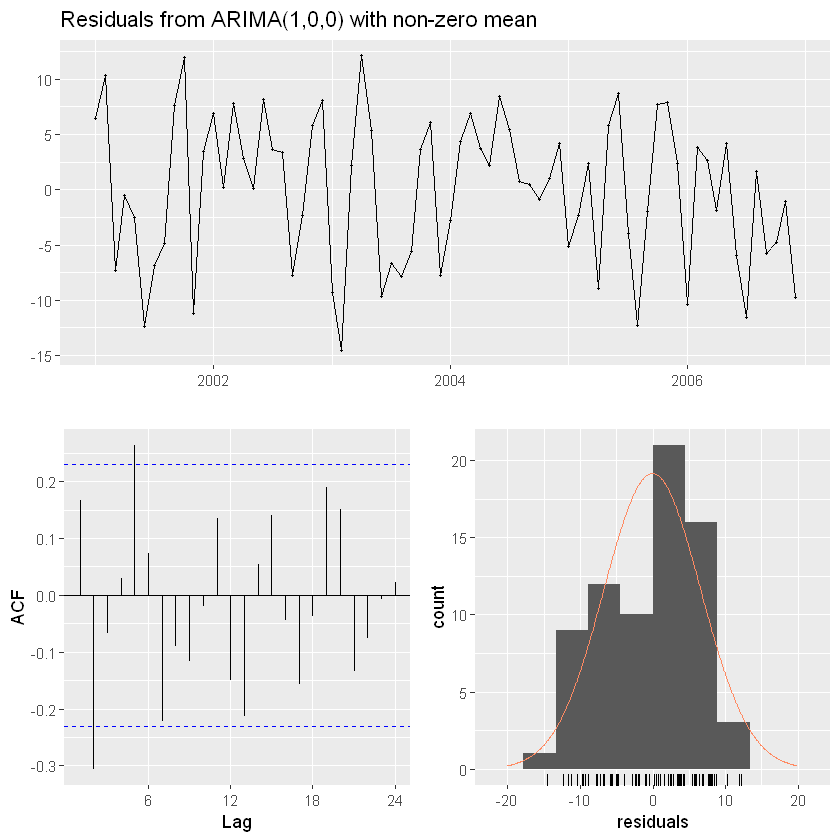


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 22.906, df = 11, p-value = 0.01823

Model df: 3.   Total lags used: 14




	Box-Pierce test

data:  ar2_fit$residuals
X-squared = 0.43944, df = 1, p-value = 0.5074


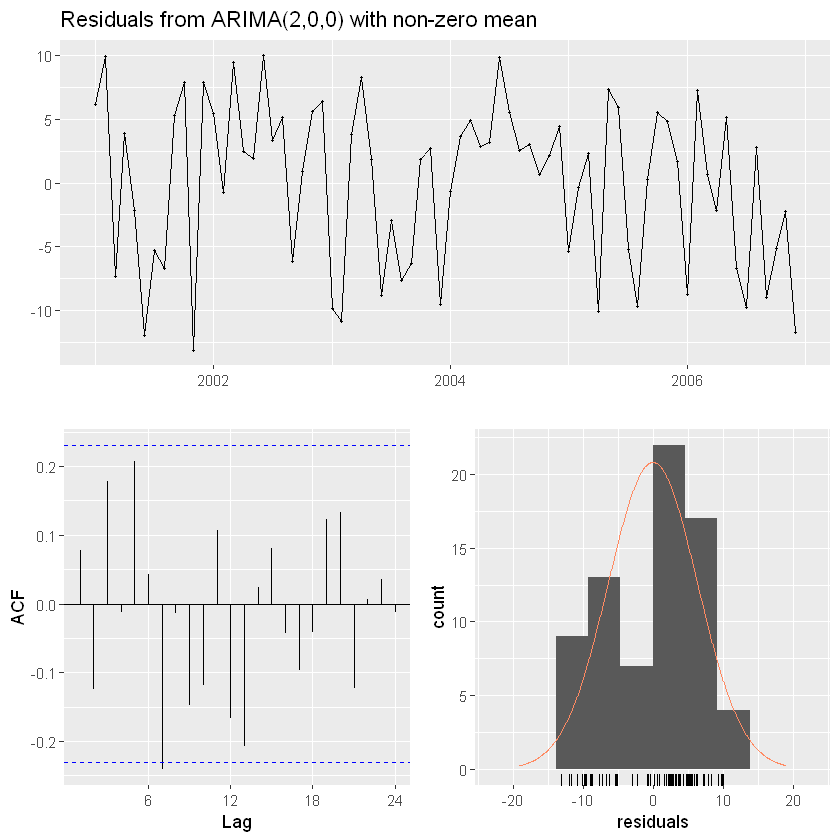


	Ljung-Box test

data:  Residuals from ARIMA(0,0,1)(0,0,1)[12] with non-zero mean
Q* = 11.721, df = 11, p-value = 0.385

Model df: 3.   Total lags used: 14




	Box-Pierce test

data:  auto_fit$residuals
X-squared = 0.38449, df = 1, p-value = 0.5352


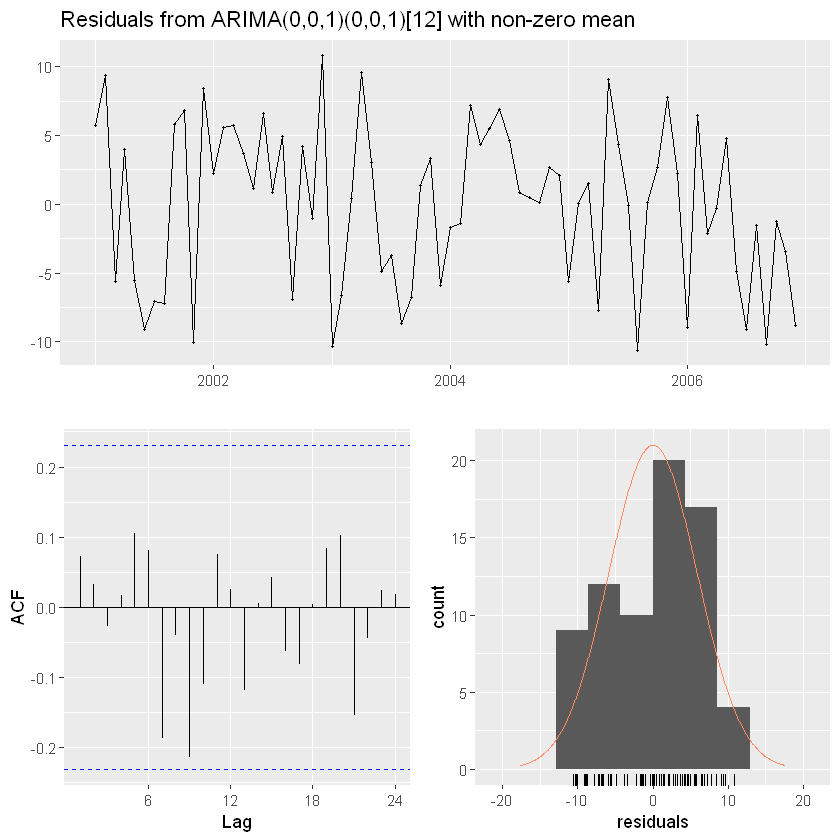

In [32]:
checkresiduals(ar1_fit)
Box.test(ar1_fit$residuals)

checkresiduals(ar2_fit)
Box.test(ar2_fit$residuals)

checkresiduals(auto_fit)
Box.test(auto_fit$residuals)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       95.96448 88.32557 103.6034 84.28178 107.6472
Feb 2007      101.55582 91.74532 111.3663 86.55196 116.5597
Mar 2007      100.62471 90.81421 110.4352 85.62085 115.6286
Apr 2007      101.84622 92.03572 111.6567 86.84235 116.8501
May 2007      100.26396 90.45346 110.0745 85.26009 115.2678

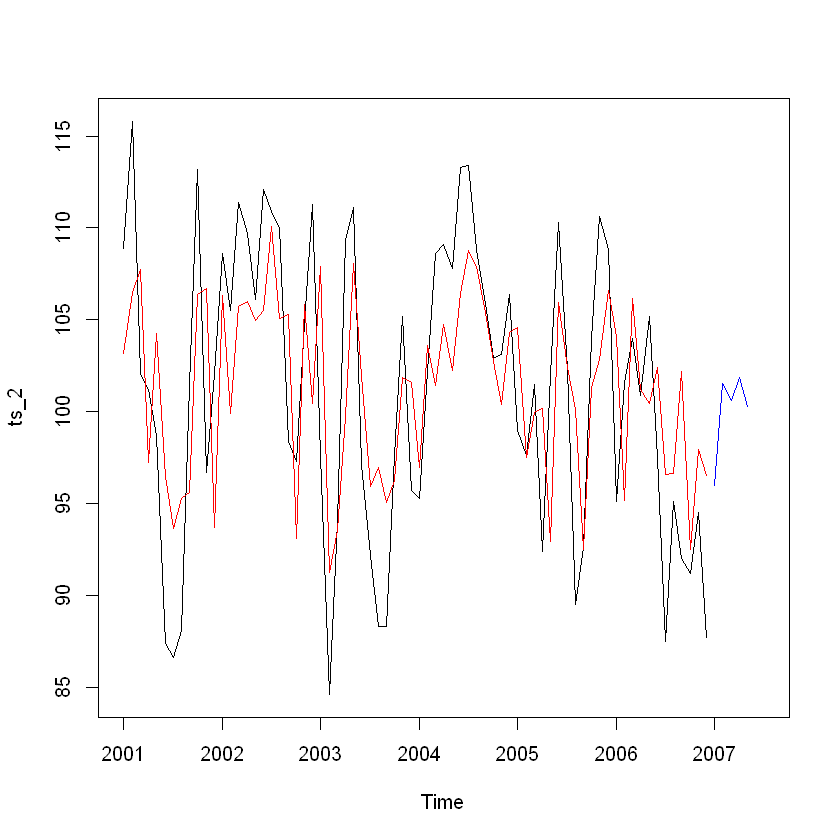

In [35]:
for_auto<-forecast(auto_fit, h=5)
for_auto

plot(ts_2, xlim=c(2001, 2007.5))
lines(for_auto$fitted, col='red')
lines(for_auto$mean, col='blue')


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0482 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


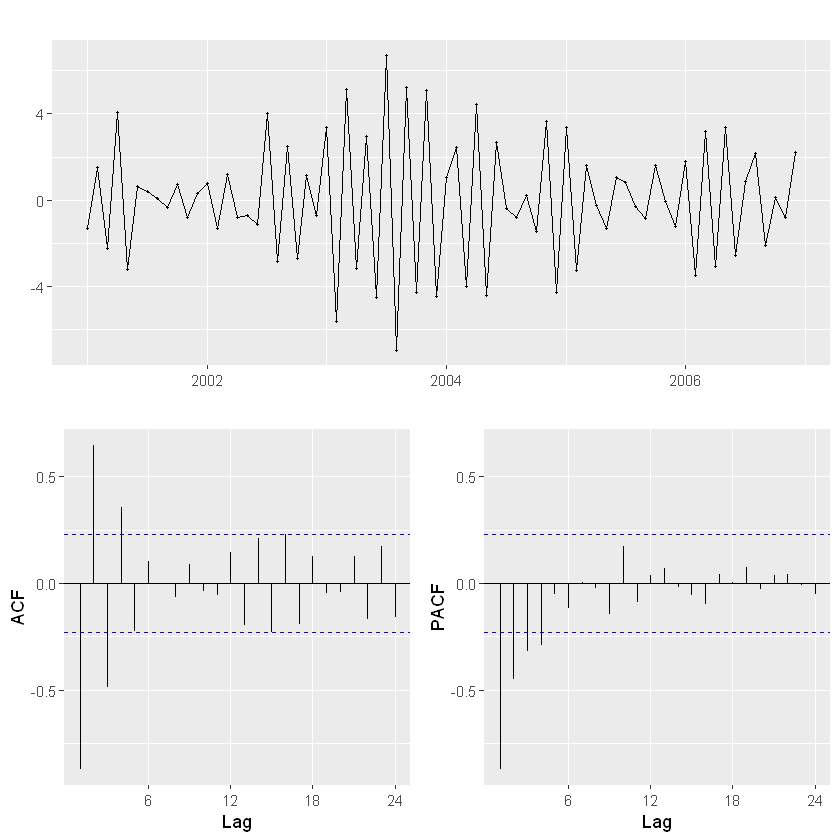

In [36]:
# kpss검정
summary(ur.kpss(ts_3))

# acf,pacf
ggtsdisplay(ts_3)

# AR(1)이나 ARMA 모형을 사용해보고싶다, AUTO까지

In [38]:
# AR(1)
ar1_fit<-Arima(ts_3, order=c(1,0,0))
summary(ar1_fit)
# 식 : yt = (-0.8681)*yt-1 + (-0.0022)*(1-(-0.8681))

# ARMA
arma_fit<-Arima(ts_3, order=c(1,0,1))
summary(arma_fit)
# 식 : yt = (-0.7634)*yt-1 + (-0.8175)*εt-1 + (-0.0085)*(1-(-0.7634))

#auto
auto_fit<-Arima(ts_3)
summary(auto_fit)

Series: ts_3 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
          ar1     mean
      -0.8681  -0.0022
s.e.   0.0550   0.0878

sigma^2 estimated as 1.965:  log likelihood=-126.18
AIC=258.35   AICc=258.7   BIC=265.18

Training set error measures:
                       ME    RMSE      MAE       MPE     MAPE      MASE
Training set -0.006621219 1.38234 1.095488 -39.76907 141.5766 0.3338376
                   ACF1
Training set -0.4261451
Series: ts_3 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1     mean
      -0.7634  -0.8175  -0.0085
s.e.   0.0752   0.0676   0.0140

sigma^2 estimated as 1.173:  log likelihood=-107.86
AIC=223.73   AICc=224.32   BIC=232.83

Training set error measures:
                     ME    RMSE       MAE       MPE     MAPE      MASE
Training set 0.01356656 1.06044 0.8624718 -28.78277 112.6165 0.2628285
                    ACF1
Training set -0.07653604
Series: ts_3 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      0.003


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 13.366, df = 12, p-value = 0.343

Model df: 2.   Total lags used: 14



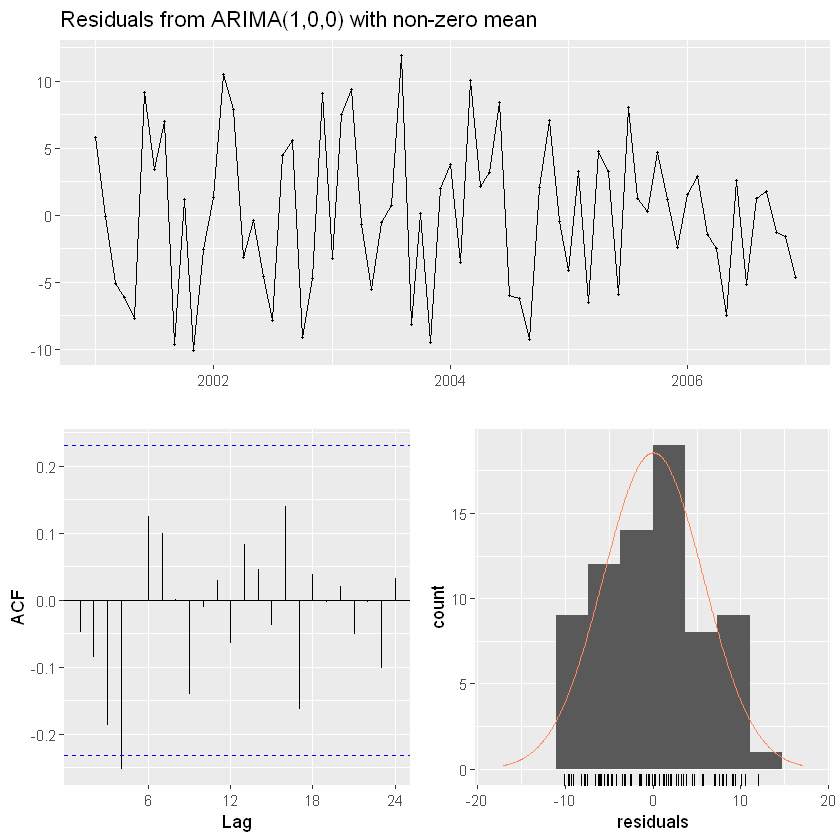


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 9.3905, df = 11, p-value = 0.5859

Model df: 3.   Total lags used: 14



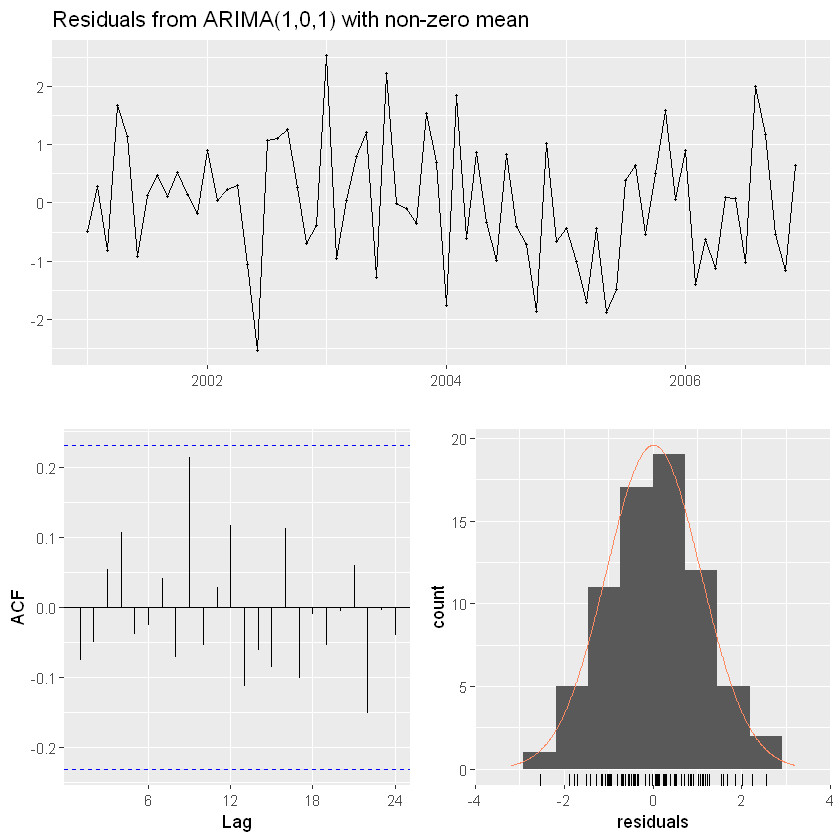

In [43]:
# 잔차검정
checkresiduals(ar_fit)
checkresiduals(arma_fit)


         Point Forecast      Lo 80      Hi 80     Lo 95       Hi 95
Jan 2007     -2.2083064 -3.5965447 -0.8200681 -4.331434 -0.08517908
Feb 2007      1.6709073 -0.9260077  4.2678223 -2.300731  5.64254606
Mar 2007     -1.2906404 -4.3811701  1.7998892 -6.017198  3.43591680
Apr 2007      0.9703242 -2.3744695  4.3151179 -4.145096  6.08574469
May 2007     -0.7557871 -4.2402283  2.7286541 -6.084780  4.57320588

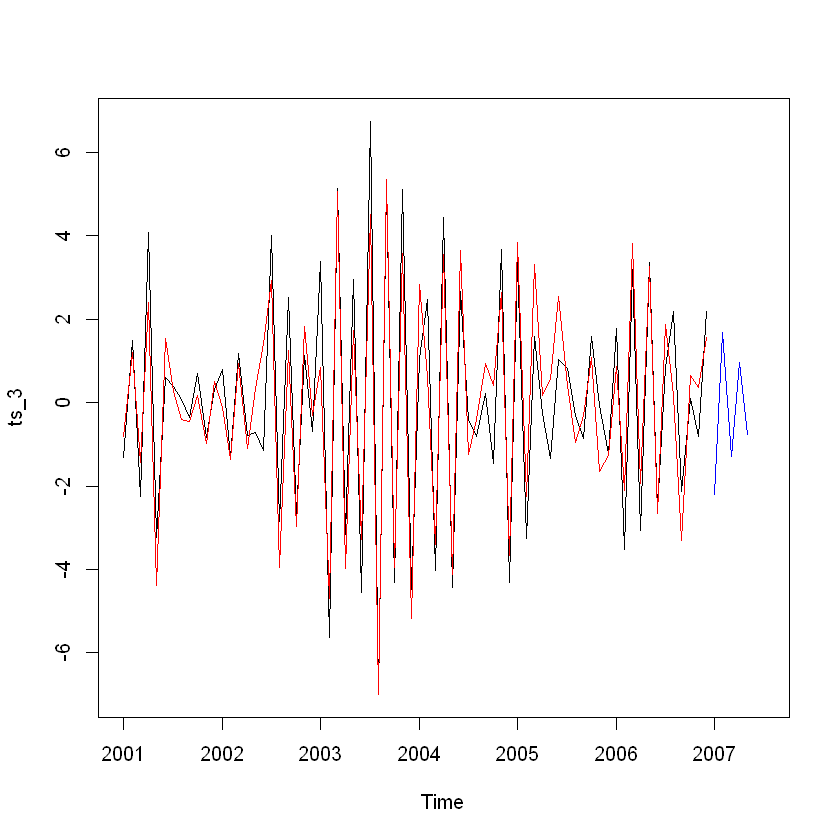

In [45]:
for_arma<-forecast(arma_fit, h=5)
for_arma

plot(ts_3, xlim=c(2001,2007.5))
lines(for_arma$fitted, col='red')
lines(for_arma$mean, col='blue')


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.1378 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


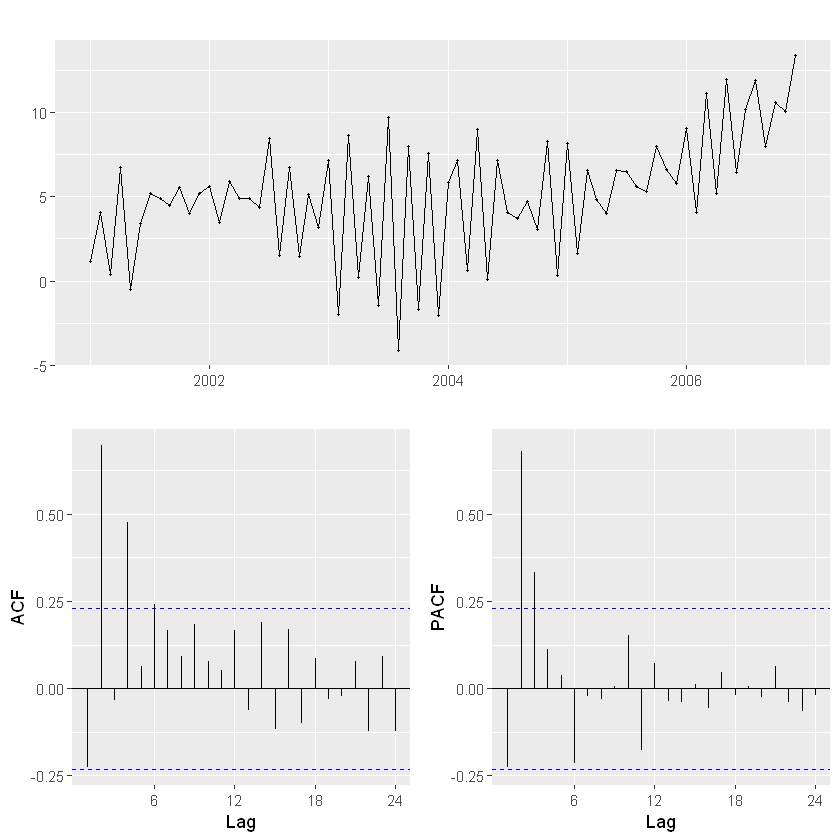

In [46]:
# kpss검정
summary(ur.kpss(ts_4))
# 귀무가설 기각 - 정상성아님

# acf, pacf
ggtsdisplay(ts_4)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0874 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


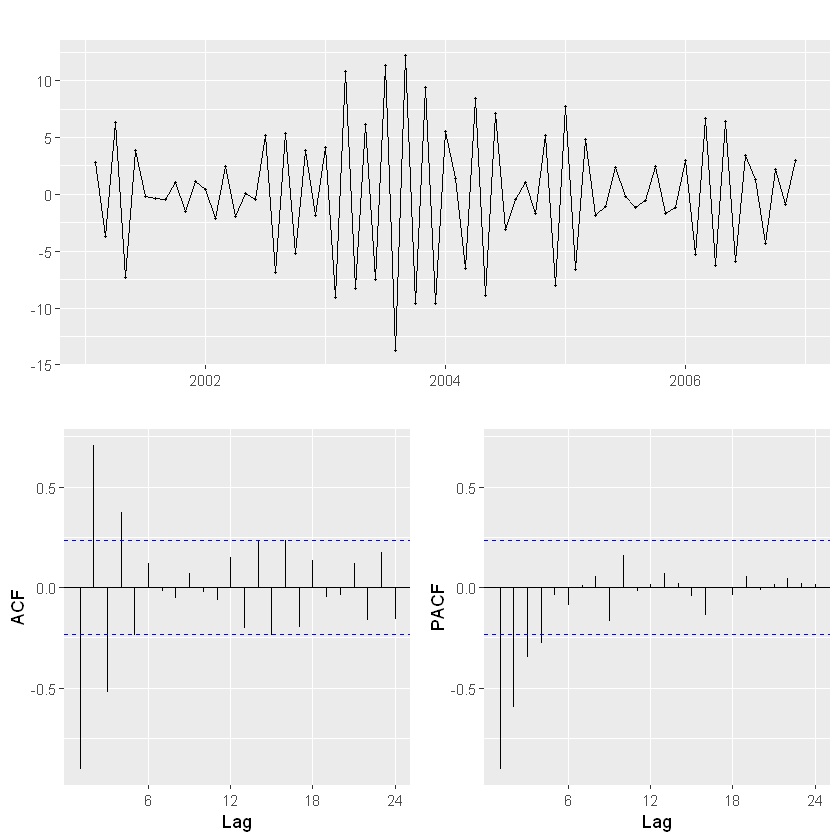

In [47]:
# 1번 차분한 데이터 보기
summary(ur.kpss(diff(ts_4)))

# acf, pacf
ggtsdisplay(diff(ts_3))

In [49]:
# 1번 차분해야하니 ARIMA모형중에서 ARIMA(2,1,2) 나 ARIMA(2,1,1) 나 ARIM1(1,1,2) 하고 AUTO해보기
arima212<-Arima(ts_4, order=c(2,1,2))
arima211<-Arima(ts_4, order=c(2,1,1))
arima112<-Arima(ts_4, order=c(1,1,2))
auto<-auto.arima(ts_4)

summary(arima212)
summary(arima211)
summary(arima112)
summary(auto)

Series: ts_4 
ARIMA(2,1,2) 

Coefficients:
          ar1     ar2      ma1     ma2
      -0.5956  0.0882  -1.0174  0.5096
s.e.   0.2434  0.2285   0.2044  0.1320

sigma^2 estimated as 3.875:  log likelihood=-148.22
AIC=306.45   AICc=307.37   BIC=317.76

Training set error measures:
                    ME    RMSE      MAE       MPE     MAPE      MASE
Training set 0.3781545 1.89886 1.456758 -19.54588 64.73132 0.3899245
                    ACF1
Training set -0.05251629
Series: ts_4 
ARIMA(2,1,1) 

Coefficients:
          ar1      ar2      ma1
      -1.1526  -0.3424  -0.3812
s.e.   0.1489   0.1441   0.1284

sigma^2 estimated as 4.136:  log likelihood=-150.88
AIC=309.76   AICc=310.36   BIC=318.81

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.4810276 1.976322 1.491849 -0.7433238 56.16279 0.3993171
                   ACF1
Training set -0.1064766
Series: ts_4 
ARIMA(1,1,2) 

Coefficients:
          ar1      ma1     ma2
      -


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)
Q* = 7.6918, df = 10, p-value = 0.6589

Model df: 4.   Total lags used: 14



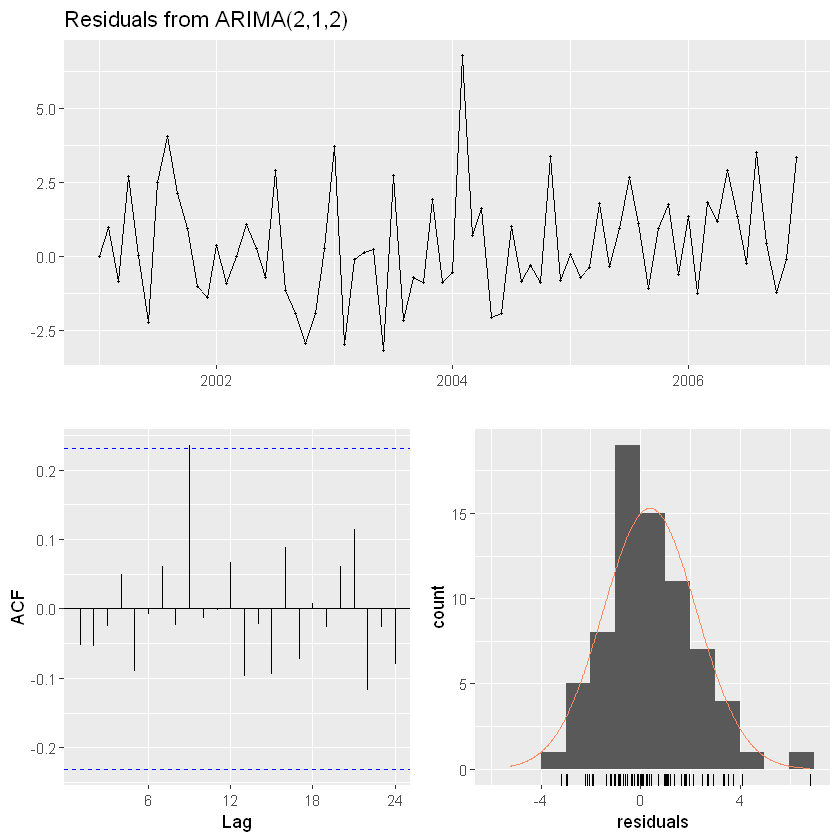


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 11.298, df = 11, p-value = 0.4186

Model df: 3.   Total lags used: 14



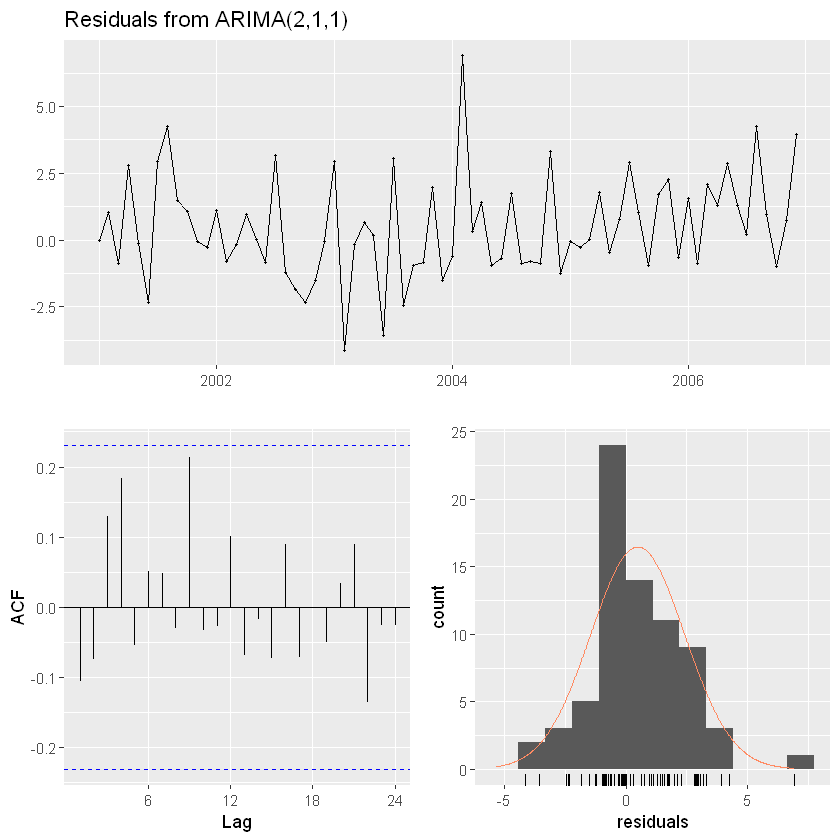


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)
Q* = 7.0572, df = 11, p-value = 0.7944

Model df: 3.   Total lags used: 14



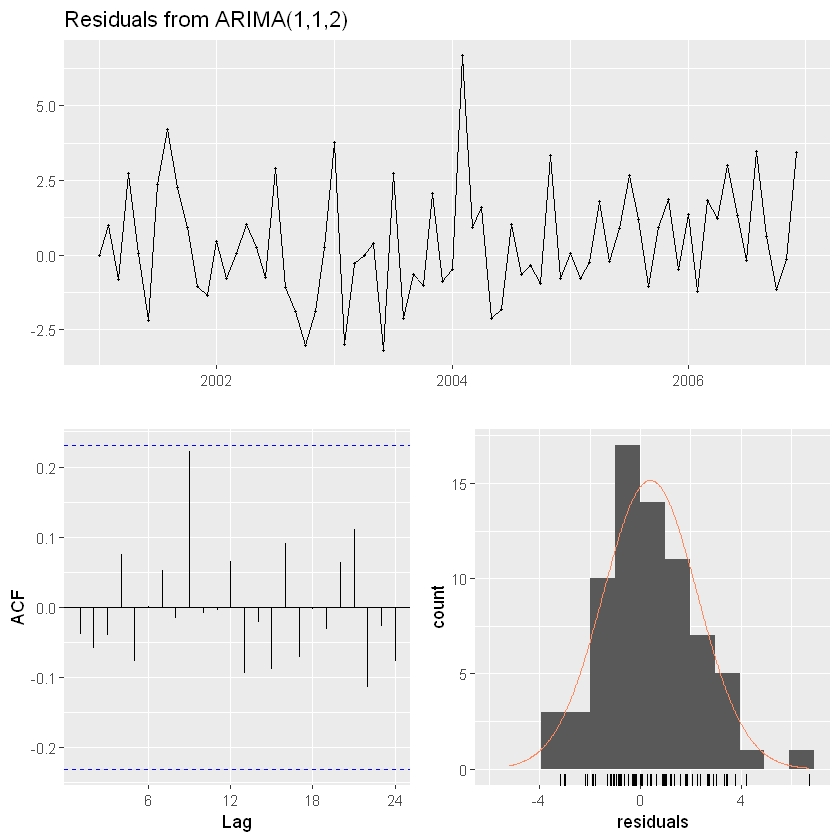


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2) with drift
Q* = 6.9979, df = 10, p-value = 0.7256

Model df: 4.   Total lags used: 14



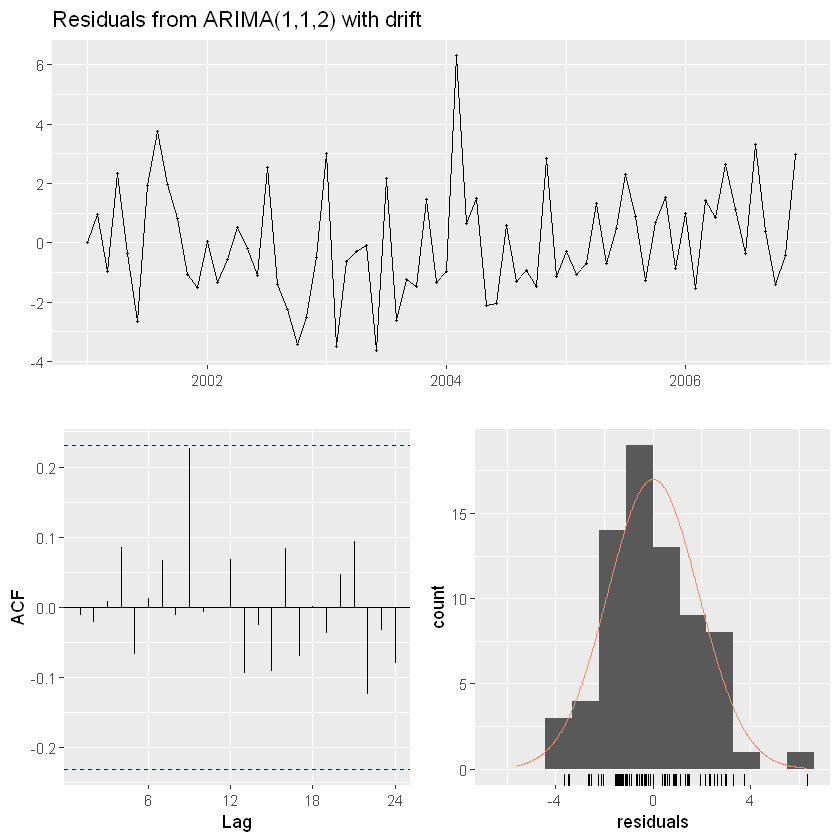

In [51]:
checkresiduals(arima212)
checkresiduals(arima211)
checkresiduals(arima112)
checkresiduals(auto)

         Point Forecast     Lo 80    Hi 80    Lo 95    Hi 95
Jan 2007       8.222720  5.755462 10.68998 4.449375 11.99607
Feb 2007      13.371272 10.412509 16.33004 8.846234 17.89631
Mar 2007       9.977451  6.226411 13.72849 4.240730 15.71417
Apr 2007      12.557061  8.779293 16.33483 6.779464 18.33466
May 2007      10.959625  6.903253 15.01600 4.755940 17.16331

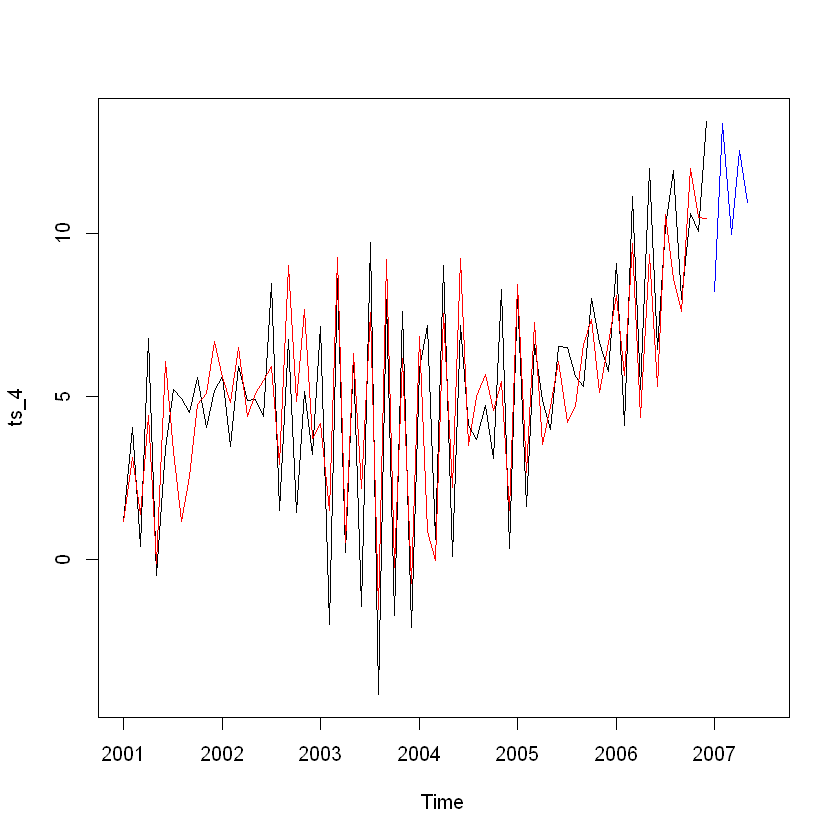

In [52]:
for_auto<-forecast(auto, h=5)
for_auto

plot(ts_4, xlim=c(2001,2007.5))
lines(for_auto$fitted, col='red')
lines(for_auto$mean, col='blue')